## Embedding Clustering

En este notebook hay código para poder poder plotear embeddings de datos de texto e imágenes

In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

### Importamos el dataset consolidado

In [28]:
dataset_df = pd.read_excel('../../data/dataset_v4.xlsx')
dataset_df.head()

Unnamed: 0 catalogation_id        cronology  cronology_time culture_cl  \
0           0        ML020107  Horizonte Medio               7      Sican   
1           1        ML020108  Horizonte Medio               7      Sican   
2           2        ML020109  Horizonte Medio               7      Sican   
3           3        ML020110  Horizonte Medio               7      Sican   
4           4        ML020111  Horizonte Medio               7      Sican   

                            morfofunctional_category  \
0  botella doble cuerpo asa puente cintada silbadora   
1  botella doble pico asa puente cintada escultorica   
2  botella gollete asa puente cintada protoma sil...   
3  botella gollete asa puente cintada protoma sil...   
4  botella gollete asa puente cintada protoma sil...   

                                         description principal_scene  \
0  botella doble cuerpo asa puente cintada silbad...             NaN   
1  botella doble pico asa puente cintada escultor...             NaN   
2  botella gollete asa puente cintada protoma sil...             NaN   
3  botella gollete asa puente cintada protoma sil...             NaN   
4  botella gollete asa puente cintada protoma sil...             NaN   

  decoration_tecnique_external_body_section1 color_external_body_section1  \
0                        pintado escultorico              crema y naranja   
1                        pintado escultorico               rojo y naranja   
2                        pintado escultorico              crema y naranja   
3                        pintado escultorico              crema y naranja   
4                        pintado escultorico               crema y marron   

   ... trait_n89 trait_n90 trait_n100  trait_n101  trait_n102  trait_n103  \
0  ...         0         0          1           1           1           0   
1  ...         0         0          1           1           1           0   
2  ...         0         0          1           1           1           0   
3  ...         0         0          1           1           1           0   
4  ...         0         0          1           1           1           0   

   trait_n104  trait_n105                                          file_path  \
0           1           0  data/sican_7/7 ADMINISTRADOR COLECCIONES VIRTU...   
1           1           0  data/sican_7/7 ADMINISTRADOR COLECCIONES VIRTU...   
2           1           0  data/sican_7/7 ADMINISTRADOR COLECCIONES VIRTU...   
3           1           0  data/sican_7/7 ADMINISTRADOR COLECCIONES VIRTU...   
4           1           0  data/sican_7/7 ADMINISTRADOR COLECCIONES VIRTU...   

                  image_path  
0  data/images/ML020107a.jpg  
1  data/images/ML020108a.jpg  
2  data/images/ML020109a.jpg  
3  data/images/ML020110a.jpg  
4  data/images/ML020111a.jpg  

[5 rows x 123 columns]

In [29]:
'''
Reglas de descarte
    - drop if culture_cl=="Chanca"
    -  drop if culture_cl=="Lima"
    -  drop if culture_cl=="Cajamarca" & period_n==5
    -  drop if culture_cl=="Cajamarca" & period_n==7
    -  drop if culture_cl=="Pukara" & period_n==6
    -  drop if culture_cl=="Salinar" & period_n==6
    -  drop if culture_cl=="Sican" & period_n==8
    - drop if culture_cl=="Vicus" & period_n==6
    - drop if region is null
'''
dataset_df = dataset_df[dataset_df.culture_cl != 'Chanca']
dataset_df = dataset_df[dataset_df.culture_cl != 'Lima']
dataset_df = dataset_df[~((dataset_df.culture_cl == 'Cajamarca') & (dataset_df.cronology_time == 5))]
dataset_df = dataset_df[~((dataset_df.culture_cl == 'Cajamarca') & (dataset_df.cronology_time == 7))]
dataset_df = dataset_df[~((dataset_df.culture_cl == 'Pukara') & (dataset_df.cronology_time == 6))]
dataset_df = dataset_df[~((dataset_df.culture_cl == 'Salinar') & (dataset_df.cronology_time == 6))]
dataset_df = dataset_df[~((dataset_df.culture_cl == 'Sican') & (dataset_df.cronology_time == 8))]
dataset_df = dataset_df[~((dataset_df.culture_cl == 'Vicus') & (dataset_df.cronology_time == 6))]
dataset_df = dataset_df[~dataset_df.region.isnull()]
len(dataset_df)

33561

### Importamos los embeddings

In [185]:
dataset_filename = 'bert_embeddings.csv'
embedding_column = 'embedding'
sep_char = ';'

In [186]:
df = pd.read_csv(f'../../data/{dataset_filename}', sep=sep_char)
df

Unnamed: 0 catalogation_id  culture_cl  \
0               0        ML020107       Sican   
1               1        ML020108       Sican   
2               2        ML020109       Sican   
3               3        ML020110       Sican   
4               4        ML020111       Sican   
...           ...             ...         ...   
33576       33577        ML038832  Tiahuanaco   
33577       33578        ML038833  Tiahuanaco   
33578       33579        ML015075   Cajamarca   
33579       33580        ML015241   Cajamarca   
33580       33581        ML033280   Cajamarca   

                                             description  \
0      botella doble cuerpo asa puente cintada silbad...   
1      botella doble pico asa puente cintada escultor...   
2      botella gollete asa puente cintada protoma sil...   
3      botella gollete asa puente cintada protoma sil...   
4      botella gollete asa puente cintada protoma sil...   
...                                                  ...   
33576  plato con diseños geometricos de lineas horizo...   
33577  plato con diseños geometricos de eses ( s) y l...   
33578  cuenco escultorico que representa a un felino ...   
33579  cuenco con representacion de cabeza estilizada...   
33580                                          cantaro .   

                                               embedding  
0      [0.17316726, -0.6274872, 0.0407279, -0.0887306...  
1      [0.17790586, -0.68238825, -0.40351287, -0.2387...  
2      [0.07478304, -0.5415242, -0.34691423, 0.007677...  
3      [-0.06786743, -0.45162752, -0.20201102, -0.069...  
4      [0.095533825, -0.518077, -0.30639765, -0.22455...  
...                                                  ...  
33576  [-0.21575417, -0.6014442, -0.5351323, 0.295663...  
33577  [-0.59130156, -1.0794916, -0.2997423, -0.03917...  
33578  [0.10485042, -0.74276745, -0.27508265, -0.3266...  
33579  [0.7909232, -0.19150409, -0.6404954, -0.548680...  
33580  [0.8797604, -0.4890832, 0.32514358, -0.1233012...  

[33581 rows x 5 columns]

Agregamos la columna de cronología en caso no exista

In [187]:
if 'cronology_time' not in df.columns.tolist():
    df['cronology_time'] = dataset_df['cronology_time']
if 'region' not in df.columns.tolist():
    df['region'] = dataset_df['region']

Agregamos las columnas de traits al dataset

In [188]:
trait_columns = [col for col in dataset_df.columns.tolist() if 'trait_' in col]
for t in trait_columns:
    df[t] = dataset_df[t]
df.head()

/var/folders/5x/tlp5fd614dv9y_wn8nmtqv4rqq_frn/T/ipykernel_10928/3621872797.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[t] = dataset_df[t]
/var/folders/5x/tlp5fd614dv9y_wn8nmtqv4rqq_frn/T/ipykernel_10928/3621872797.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[t] = dataset_df[t]
/var/folders/5x/tlp5fd614dv9y_wn8nmtqv4rqq_frn/T/ipykernel_10928/3621872797.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

Unnamed: 0 catalogation_id culture_cl  \
0           0        ML020107      Sican   
1           1        ML020108      Sican   
2           2        ML020109      Sican   
3           3        ML020110      Sican   
4           4        ML020111      Sican   

                                         description  \
0  botella doble cuerpo asa puente cintada silbad...   
1  botella doble pico asa puente cintada escultor...   
2  botella gollete asa puente cintada protoma sil...   
3  botella gollete asa puente cintada protoma sil...   
4  botella gollete asa puente cintada protoma sil...   

                                           embedding  cronology_time  \
0  [0.17316726, -0.6274872, 0.0407279, -0.0887306...               7   
1  [0.17790586, -0.68238825, -0.40351287, -0.2387...               7   
2  [0.07478304, -0.5415242, -0.34691423, 0.007677...               7   
3  [-0.06786743, -0.45162752, -0.20201102, -0.069...               7   
4  [0.095533825, -0.518077, -0.30639765, -0.22455...               7   

        region  trait_color_amarillo  trait_color_beige  trait_color_blanco  \
0  Costa Norte                     0                  0                   0   
1  Costa Norte                     0                  0                   0   
2  Costa Norte                     0                  0                   0   
3  Costa Norte                     0                  0                   0   
4  Costa Norte                     0                  0                   0   

   ...  trait_n87  trait_n88  trait_n89  trait_n90  trait_n100  trait_n101  \
0  ...          0          0          0          0           1           1   
1  ...          0          0          0          0           1           1   
2  ...          0          0          0          0           1           1   
3  ...          0          0          0          0           1           1   
4  ...          0          0          0          0           1           1   

   trait_n102  trait_n103  trait_n104  trait_n105  
0           1           0           1           0  
1           1           0           1           0  
2           1           0           1           0  
3           1           0           1           0  
4           1           0           1           0  

[5 rows x 115 columns]

In [189]:
df = df.drop('Unnamed: 0', axis=1, errors='ignore')
display(dataset_df.head())
len(df)

catalogation_id culture_cl  \
0        ML020107      Sican   
1        ML020108      Sican   
2        ML020109      Sican   
3        ML020110      Sican   
4        ML020111      Sican   

                                         description  \
0  botella doble cuerpo asa puente cintada silbad...   
1  botella doble pico asa puente cintada escultor...   
2  botella gollete asa puente cintada protoma sil...   
3  botella gollete asa puente cintada protoma sil...   
4  botella gollete asa puente cintada protoma sil...   

                                           embedding  cronology_time  \
0  [0.17316726, -0.6274872, 0.0407279, -0.0887306...               7   
1  [0.17790586, -0.68238825, -0.40351287, -0.2387...               7   
2  [0.07478304, -0.5415242, -0.34691423, 0.007677...               7   
3  [-0.06786743, -0.45162752, -0.20201102, -0.069...               7   
4  [0.095533825, -0.518077, -0.30639765, -0.22455...               7   

        region  trait_color_amarillo  trait_color_beige  trait_color_blanco  \
0  Costa Norte                     0                  0                   0   
1  Costa Norte                     0                  0                   0   
2  Costa Norte                     0                  0                   0   
3  Costa Norte                     0                  0                   0   
4  Costa Norte                     0                  0                   0   

   trait_color_crema  ...  trait_n87  trait_n88  trait_n89  trait_n90  \
0                  1  ...          0          0          0          0   
1                  0  ...          0          0          0          0   
2                  1  ...          0          0          0          0   
3                  1  ...          0          0          0          0   
4                  1  ...          0          0          0          0   

   trait_n100  trait_n101  trait_n102  trait_n103  trait_n104  trait_n105  
0           1           1           1           0           1           0  
1           1           1           1           0           1           0  
2           1           1           1           0           1           0  
3           1           1           1           0           1           0  
4           1           1           1           0           1           0  

[5 rows x 114 columns]

33581

### Limpiamos el dataset de embeddings

In [190]:
'''
Reglas de descarte
    - drop if culture_cl=="Chanca"
    -  drop if culture_cl=="Lima"
    -  drop if culture_cl=="Cajamarca" & period_n==5
    -  drop if culture_cl=="Cajamarca" & period_n==7
    -  drop if culture_cl=="Pukara" & period_n==6
    -  drop if culture_cl=="Salinar" & period_n==6
    -  drop if culture_cl=="Sican" & period_n==8
    - drop if culture_cl=="Vicus" & period_n==6
    - drop if region is null
'''
df = df[df.culture_cl != 'Chanca']
df = df[df.culture_cl != 'Lima']
df = df[~((df.culture_cl == 'Cajamarca') & (df.cronology_time == 5))]
df = df[~((df.culture_cl == 'Cajamarca') & (df.cronology_time == 7))]
df = df[~((df.culture_cl == 'Pukara') & (df.cronology_time == 6))]
df = df[~((df.culture_cl == 'Salinar') & (df.cronology_time == 6))]
df = df[~((df.culture_cl == 'Sican') & (df.cronology_time == 8))]
df = df[~((df.culture_cl == 'Vicus') & (df.cronology_time == 6))]
df = df[~df.region.isnull()]
len(df)

33561

#### Preparamos el dataset

In [191]:
def str_to_list(string):
    string_list = string.strip('][').split(', ')
    float_list = [float(i) for i in string_list]
    return float_list

df[embedding_column] = df[embedding_column].apply(str_to_list)

In [193]:
df_spread = df[[embedding_column]].apply(lambda x: pd.Series(x[embedding_column]), axis=1).rename(columns=lambda i: f"c{i+1}")

In [194]:
df_spread.head()

c1        c2        c3        c4        c5        c6        c7  \
0  0.173167 -0.627487  0.040728 -0.088731  0.617066 -0.337456  0.135651   
1  0.177906 -0.682388 -0.403513 -0.238792  0.611270  0.088557  0.092499   
2  0.074783 -0.541524 -0.346914  0.007678  0.696107 -0.103183  0.187311   
3 -0.067867 -0.451628 -0.202011 -0.069973  0.792615 -0.012866  0.419816   
4  0.095534 -0.518077 -0.306398 -0.224559  0.642200  0.039839  0.189774   

         c8        c9       c10  ...      c759      c760      c761      c762  \
0 -0.149837  0.491086 -0.723882  ... -0.774106  0.853167 -0.180907  0.028703   
1 -0.005162  0.373875 -0.571493  ... -0.776706  0.824802  0.035774 -0.093099   
2  0.024575  0.453283 -0.905675  ... -0.408549  0.404263 -0.341050 -0.006181   
3  0.109632  0.400058 -0.870561  ... -0.316784  0.737670 -0.390274  0.306665   
4 -0.140158  0.500054 -0.721642  ... -0.602362  0.555453 -0.319298 -0.138743   

       c763      c764      c765      c766      c767      c768  
0 -0.369451 -0.308601 -0.164613 -0.693629  0.288601 -0.422965  
1  0.047395 -0.317546 -0.275383 -0.753768  0.268720 -0.551048  
2 -0.477399 -0.235129 -0.620021 -0.519903  0.018254 -0.329690  
3 -0.625972 -0.171087 -0.469137 -0.575207  0.204847 -0.062260  
4 -0.525403 -0.102353 -0.365751 -0.685777  0.198765 -0.294869  

[5 rows x 768 columns]

#### Seteamos los parámetros del gráfico

### Using umap

In [195]:
import umap

In [196]:
# Read the source code: https://github.com/lmcinnes/umap/blob/master/umap/umap_.py
reducer = umap.UMAP(n_components=2, 
                    n_neighbors=30,
                    learning_rate=0.01,
                    init='pca',
                    random_state=31)

In [197]:
df_umap = reducer.fit_transform(X=df_spread.values)

/opt/homebrew/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [198]:
df.columns.tolist()

['catalogation_id',
 'culture_cl',
 'description',
 'embedding',
 'cronology_time',
 'region',
 'trait_color_amarillo',
 'trait_color_beige',
 'trait_color_blanco',
 'trait_color_crema',
 'trait_color_gris',
 'trait_color_marron',
 'trait_color_morado',
 'trait_color_naranja',
 'trait_color_negro',
 'trait_color_rojo',
 'trait_color_rosado',
 'trait_color_verde',
 'trait_n1',
 'trait_n2',
 'trait_n3',
 'trait_n4',
 'trait_n5',
 'trait_n6',
 'trait_n7',
 'trait_n8',
 'trait_n9',
 'trait_n10',
 'trait_n11',
 'trait_n12',
 'trait_n13',
 'trait_n14',
 'trait_n15',
 'trait_n16',
 'trait_n17',
 'trait_n18',
 'trait_n19',
 'trait_n20',
 'trait_n21',
 'trait_n22',
 'trait_n23',
 'trait_n24',
 'trait_n25',
 'trait_n26',
 'trait_n27',
 'trait_n28',
 'trait_n29',
 'trait_n30',
 'trait_n31',
 'trait_n32',
 'trait_n33',
 'trait_n34',
 'trait_n35',
 'trait_n36',
 'trait_n37',
 'trait_n38',
 'trait_n39',
 'trait_n40',
 'trait_n41',
 'trait_n42',
 'trait_n43',
 'trait_n44',
 'trait_n45',
 'trait_n46',

In [199]:
df_umap = pd.DataFrame(df_umap, columns=['dim1', 'dim2'])
df_umap['catalogation_id'] = df['catalogation_id']
df_umap['culture_cl'] = df['culture_cl']
df_umap['cronology_time'] = df['cronology_time']
df_umap['region'] = df['region']
df_umap

dim1      dim2 catalogation_id culture_cl  cronology_time  \
0     -0.573351  1.163977        ML020107      Sican             7.0   
1      0.306656  2.699005        ML020108      Sican             7.0   
2      2.247834  1.464688        ML020109      Sican             7.0   
3      2.215135  1.457885        ML020110      Sican             7.0   
4      2.200386  1.481646        ML020111      Sican             7.0   
...         ...       ...             ...        ...             ...   
33556  0.516006  9.075971        ML040298     Pukara             5.0   
33557  0.156978  7.274295        ML040299     Pukara             5.0   
33558  3.739700  9.168571        ML040300     Pukara             5.0   
33559  1.184934  8.726145        ML040301     Pukara             5.0   
33560  1.100895  6.680091        ML040302     Pukara             5.0   

            region  
0      Costa Norte  
1      Costa Norte  
2      Costa Norte  
3      Costa Norte  
4      Costa Norte  
...            ...  
33556   Sierra Sur  
33557   Sierra Sur  
33558   Sierra Sur  
33559   Sierra Sur  
33560   Sierra Sur  

[33561 rows x 6 columns]

In [201]:
df_umap.to_csv('../../data/bert_umap.csv', sep=';', index=False)

# Cluster Plots

## Importamos el dataset

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [4]:
dataset_bert_name = 'bert_umap.csv'
dataset_tfidf_name = 'tfidf_umap.csv'

In [5]:
bert_df_umap = pd.read_csv(f'../../data/{dataset_bert_name}', sep=';')
tfidf_df_umap = pd.read_csv(f'../../data/{dataset_tfidf_name}', sep=';')

In [6]:
tfidf_df_umap

dim1      dim2 catalogation_id culture_cl  cronology_time  \
0       2.084823  2.115737        ML020107      Sican             7.0   
1       2.735492  1.777356        ML020108      Sican             7.0   
2       1.973301  2.197384        ML020109      Sican             7.0   
3       2.001016  2.207367        ML020110      Sican             7.0   
4       2.064728  2.268808        ML020111      Sican             7.0   
...          ...       ...             ...        ...             ...   
33556   7.515016  4.840820        ML040298     Pukara             5.0   
33557   7.388618  5.262344        ML040299     Pukara             5.0   
33558  10.101985  6.539581        ML040300     Pukara             5.0   
33559   8.295543  4.183657        ML040301     Pukara             5.0   
33560   7.456181  7.342914        ML040302     Pukara             5.0   

            region  
0      Costa Norte  
1      Costa Norte  
2      Costa Norte  
3      Costa Norte  
4      Costa Norte  
...            ...  
33556   Sierra Sur  
33557   Sierra Sur  
33558   Sierra Sur  
33559   Sierra Sur  
33560   Sierra Sur  

[33561 rows x 6 columns]

In [7]:
bert_df_umap

dim1      dim2 catalogation_id culture_cl  cronology_time  \
0     -0.573351  1.163977        ML020107      Sican             7.0   
1      0.306656  2.699005        ML020108      Sican             7.0   
2      2.247834  1.464688        ML020109      Sican             7.0   
3      2.215135  1.457885        ML020110      Sican             7.0   
4      2.200386  1.481646        ML020111      Sican             7.0   
...         ...       ...             ...        ...             ...   
33556  0.516006  9.075971        ML040298     Pukara             5.0   
33557  0.156978  7.274295        ML040299     Pukara             5.0   
33558  3.739700  9.168570        ML040300     Pukara             5.0   
33559  1.184934  8.726145        ML040301     Pukara             5.0   
33560  1.100895  6.680091        ML040302     Pukara             5.0   

            region  
0      Costa Norte  
1      Costa Norte  
2      Costa Norte  
3      Costa Norte  
4      Costa Norte  
...            ...  
33556   Sierra Sur  
33557   Sierra Sur  
33558   Sierra Sur  
33559   Sierra Sur  
33560   Sierra Sur  

[33561 rows x 6 columns]

## Seteamos los parametros del grafico

In [20]:
def sample_df(original_df, n_samples):
    cultures = original_df.culture_cl.unique().tolist()
    sampled_dfs = list()

    for c in cultures:
        culture_df = original_df[original_df.culture_cl == c]
        if n_samples > len(culture_df):
            sampled_dfs.append(culture_df)
        else:
            sampled_df = culture_df.sample(n=n_samples, random_state=100)
            sampled_dfs.append(sampled_df)
    
    df = pd.concat(sampled_dfs, axis=0)
    return df


def plot_embeddings_2d(df, 
                       attribute, 
                       model_name, 
                       path_to_save, 
                       original_df=None,
                       get_samples=False, 
                       n_samples=100, 
                       filter_by_trait: str=None):
    
    if filter_by_trait is not None and original_df is not None:
        df[filter_by_trait] = original_df[filter_by_trait]
        df = df[df[filter_by_trait] > 0]

    if get_samples:
        df = sample_df(df, n_samples)

    sns.set(rc={"figure.figsize":(12, 10)})

    ax = sns.scatterplot(df, x='dim1', y='dim2', hue=attribute, alpha=0.4)

    # configurar el gráfico    
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(f"Dos dimensiones UMAP de distintas descripciones de imágenes según '{attribute}' | {model_name}")
    plt.xlabel('Dimensión 1')
    plt.ylabel('Dimensión 2')
    plt.show()

    fig = ax.get_figure()
    fig.savefig(path_to_save) 

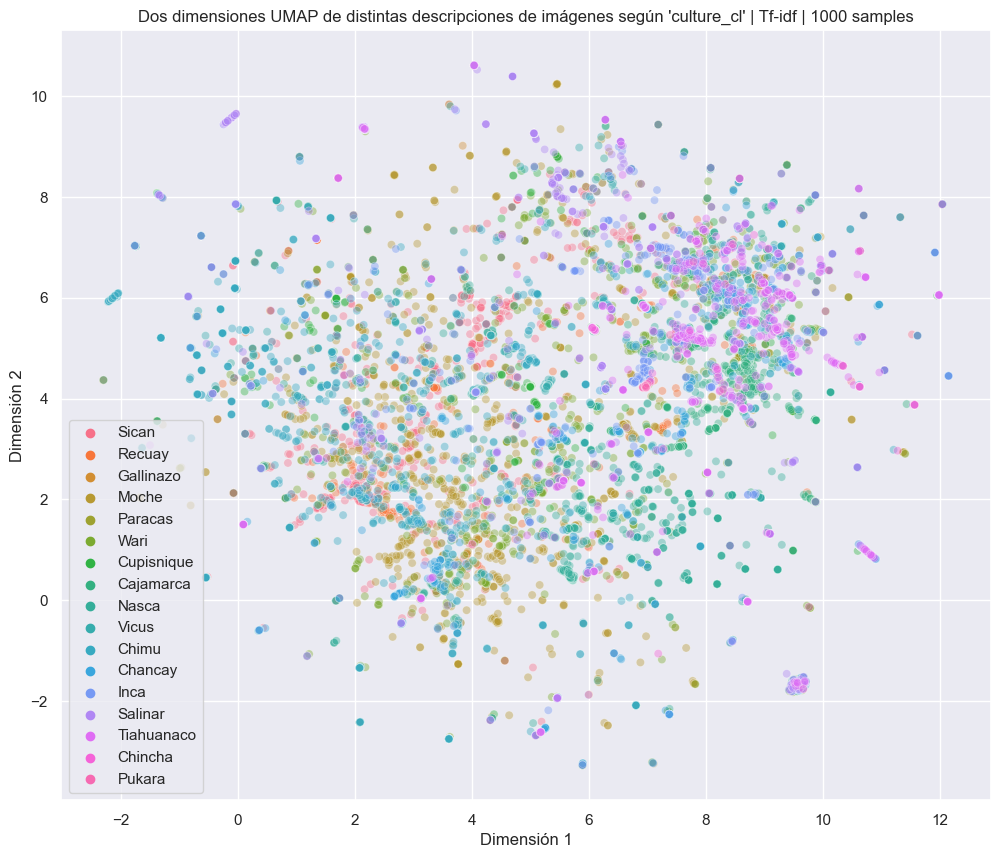

In [21]:
plot_embeddings_2d(df=tfidf_df_umap, 
                   attribute='culture_cl', 
                   model_name='Tf-idf | 1000 samples',
                   path_to_save='../../data/images/tfidf_vectors/tfidf_clusters_2d_umap_1000samples.png',
                   get_samples=True, 
                   n_samples=1000)

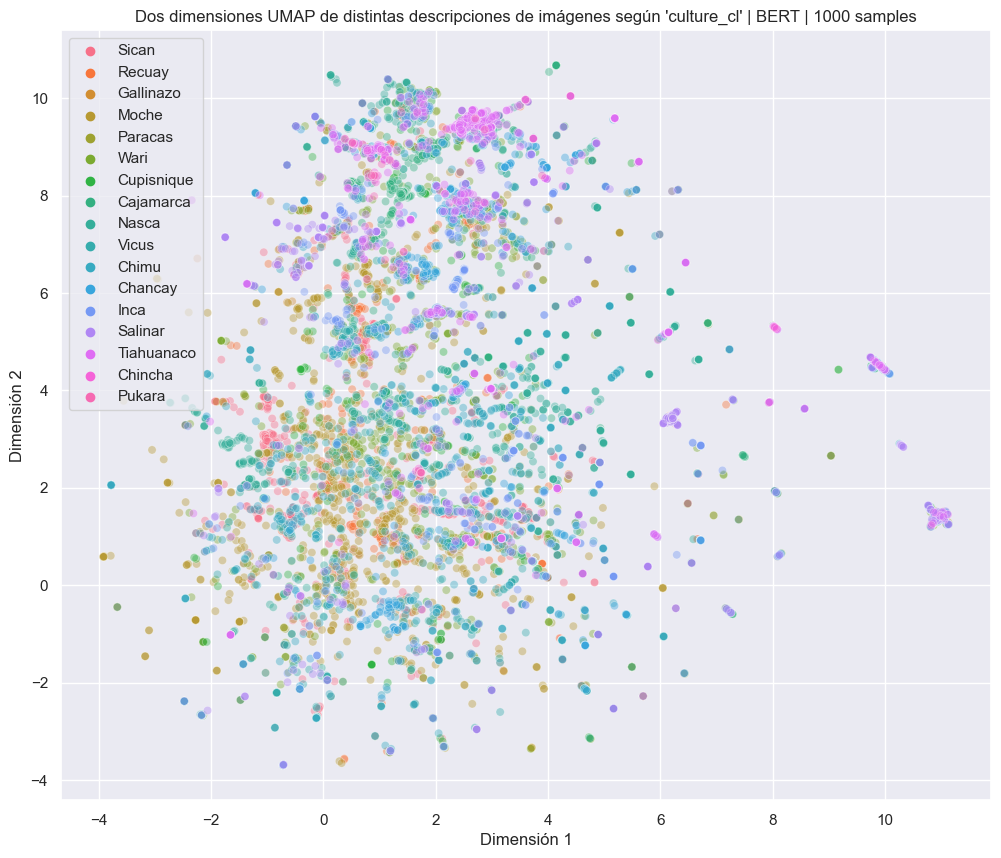

In [22]:
plot_embeddings_2d(df=bert_df_umap,
                   attribute='culture_cl', 
                   model_name='BERT | 1000 samples',
                   path_to_save='../../data/images/bert_embeddings/bert_clusters_2d_umap_1000samples.png',
                   get_samples=True, 
                   n_samples=1000)

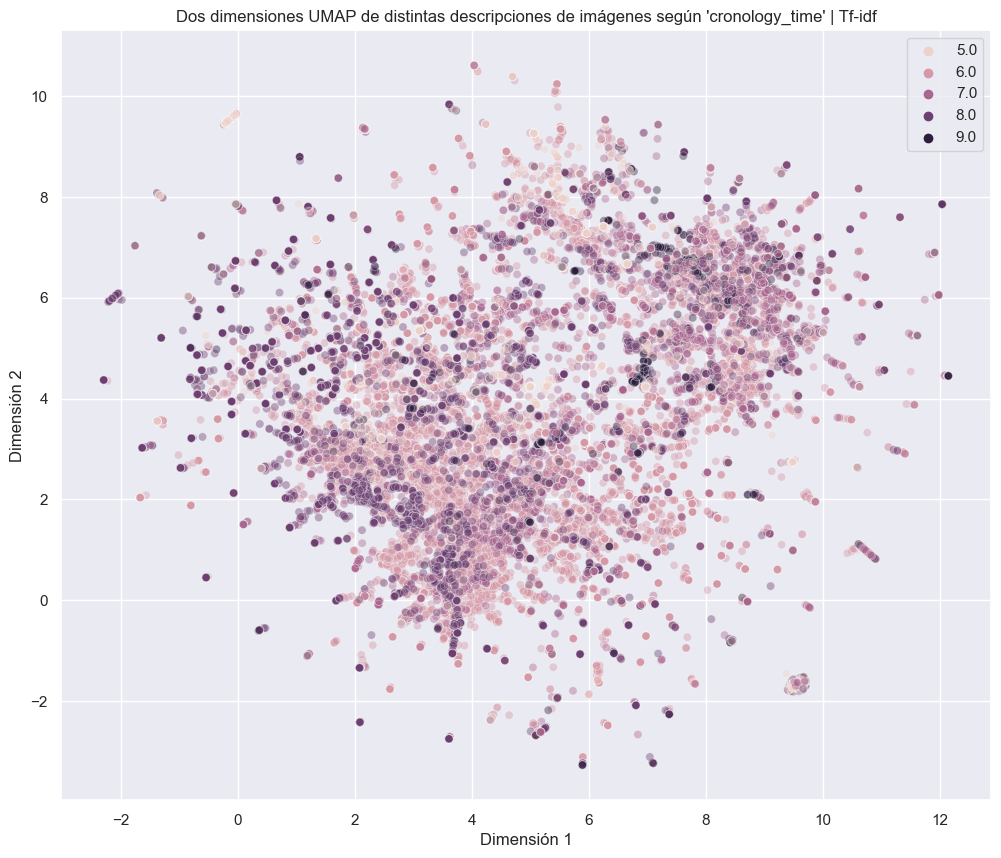

In [41]:
plot_embeddings_2d(df=tfidf_df_umap, 
                   attribute='cronology_time', 
                   model_name='Tf-idf',
                   path_to_save='../../data/images/tfidf_vectors/tfidf_clusters_2d_umap_ctime.png'
                   )

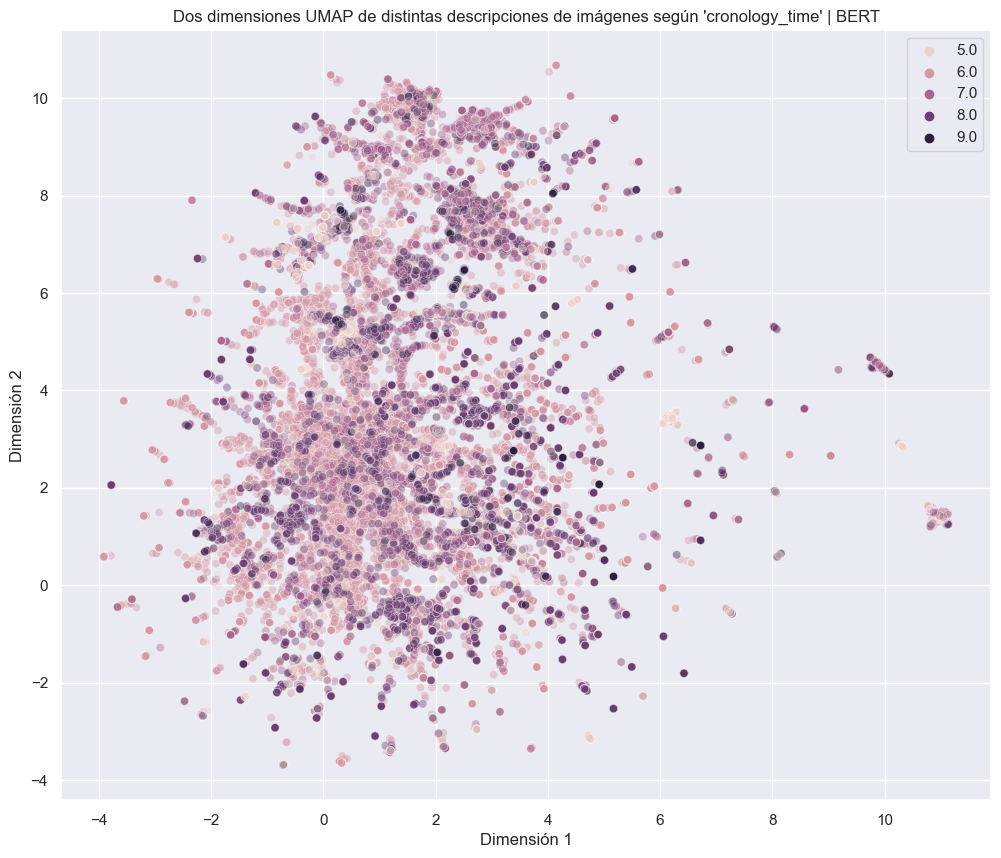

In [40]:
plot_embeddings_2d(df=bert_df_umap, 
                   attribute='cronology_time', 
                   model_name='BERT',
                   path_to_save='../../data/images/bert_embeddings/bert_clusters_2d_umap_ctime.png'
                   )

## Realizamos los plot por cronology time y filtro de trait

In [30]:
trait = 'trait_n15'

In [31]:
bert_df_umap[trait] = dataset_df[trait]
tfidf_df_umap[trait] = dataset_df[trait]

In [32]:
def plot_by_attribute(df, 
                      attribute, 
                      attribute_hue, 
                      title, 
                      path_to_save,
                      trait=None, 
                      n_samples=None
                    ):

    df_notnull = df[~df[attribute].isnull()]
    df_notnull = df[df[attribute] != 9]

    if n_samples is not None:
        df_notnull = sample_df(df_notnull, n_samples)

    if trait is not None:
        grid = sns.FacetGrid(df_notnull, col=attribute, row=trait, height=5)
    else:
        grid = sns.FacetGrid(df_notnull, col=attribute, col_wrap=3, height=5)
    g = grid.map_dataframe(sns.scatterplot, "dim1", "dim2", hue=attribute_hue, alpha=0.4)
    g.add_legend()

    g.figure.subplots_adjust(top=0.9)
    g.figure.suptitle(title)

    g.savefig(path_to_save) 

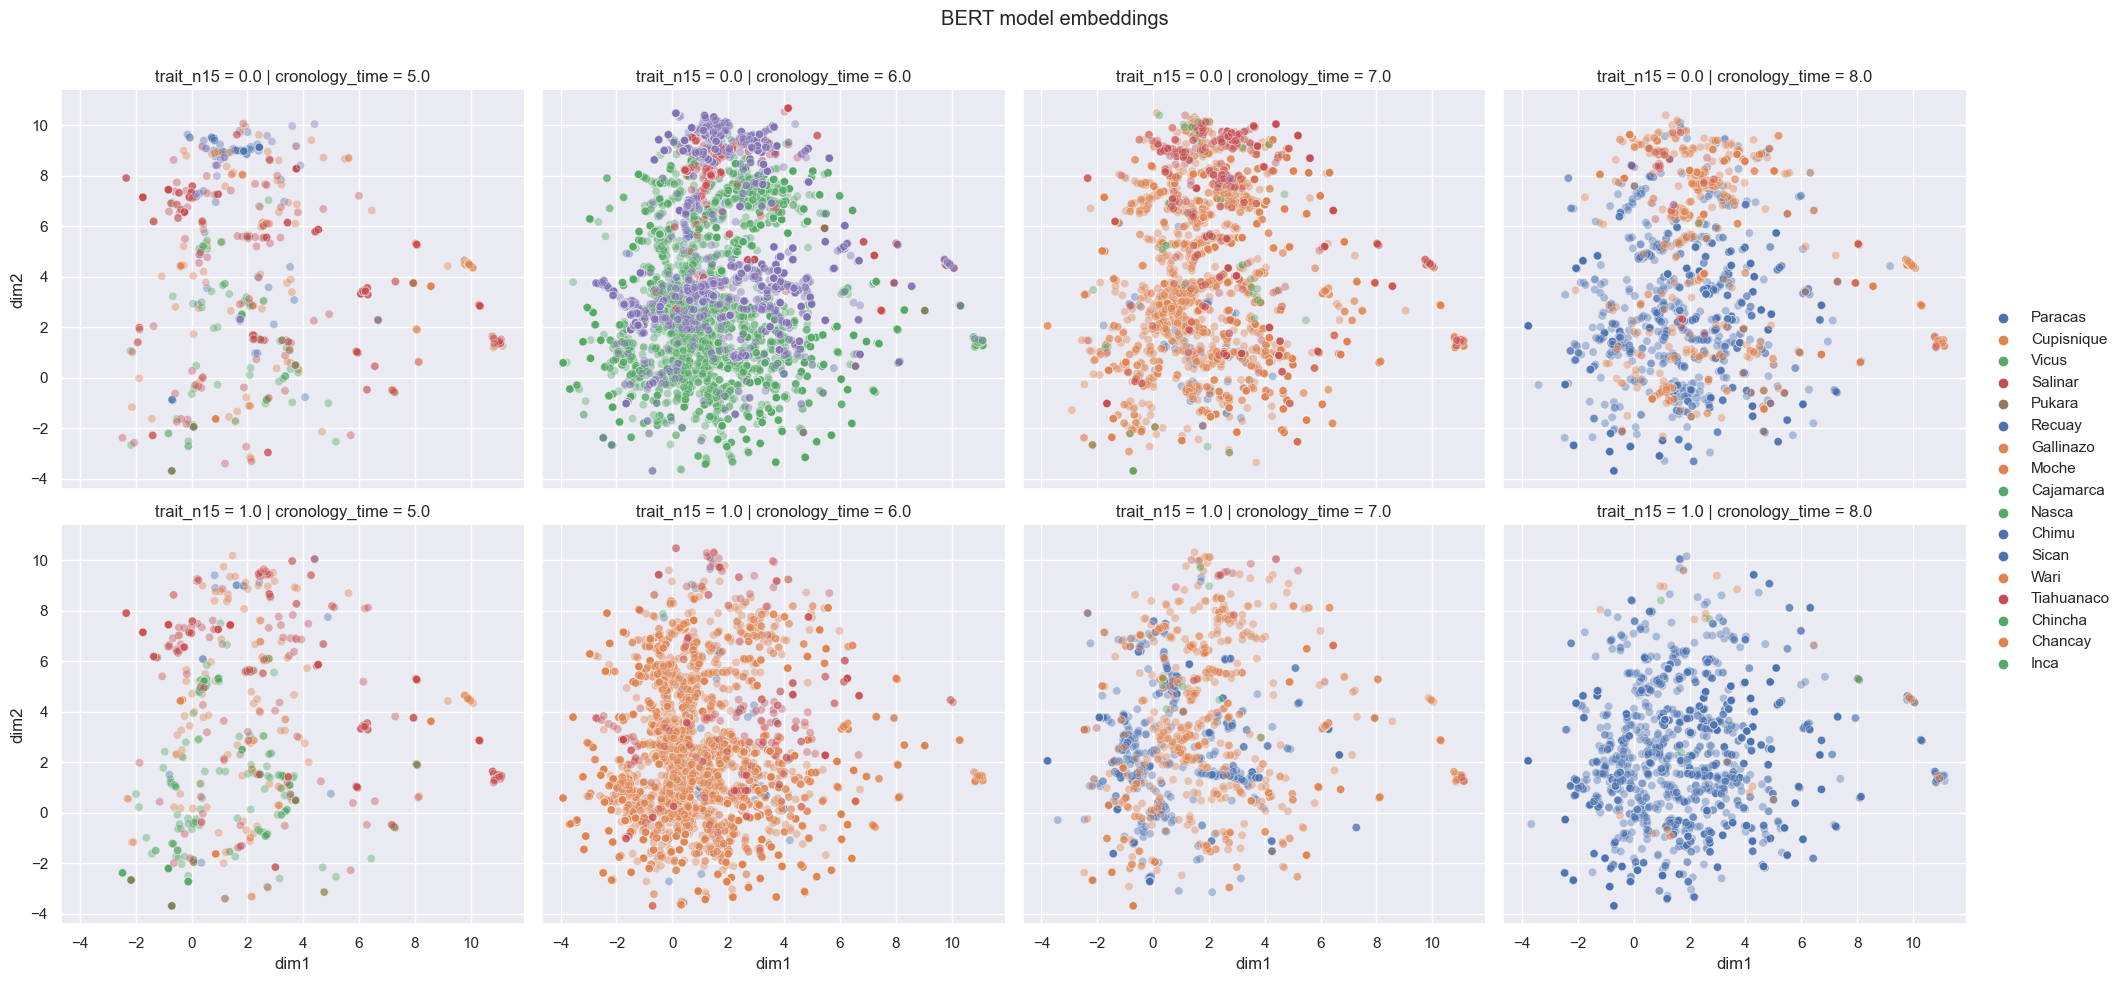

In [34]:
plot_by_attribute(df=bert_df_umap, 
                  attribute='cronology_time', 
                  attribute_hue='culture_cl', 
                  title='BERT model embeddings', 
                  path_to_save='../../data/images/bert_embeddings/bert_clusters_2d_umap_cronology.png',
                  trait=trait)

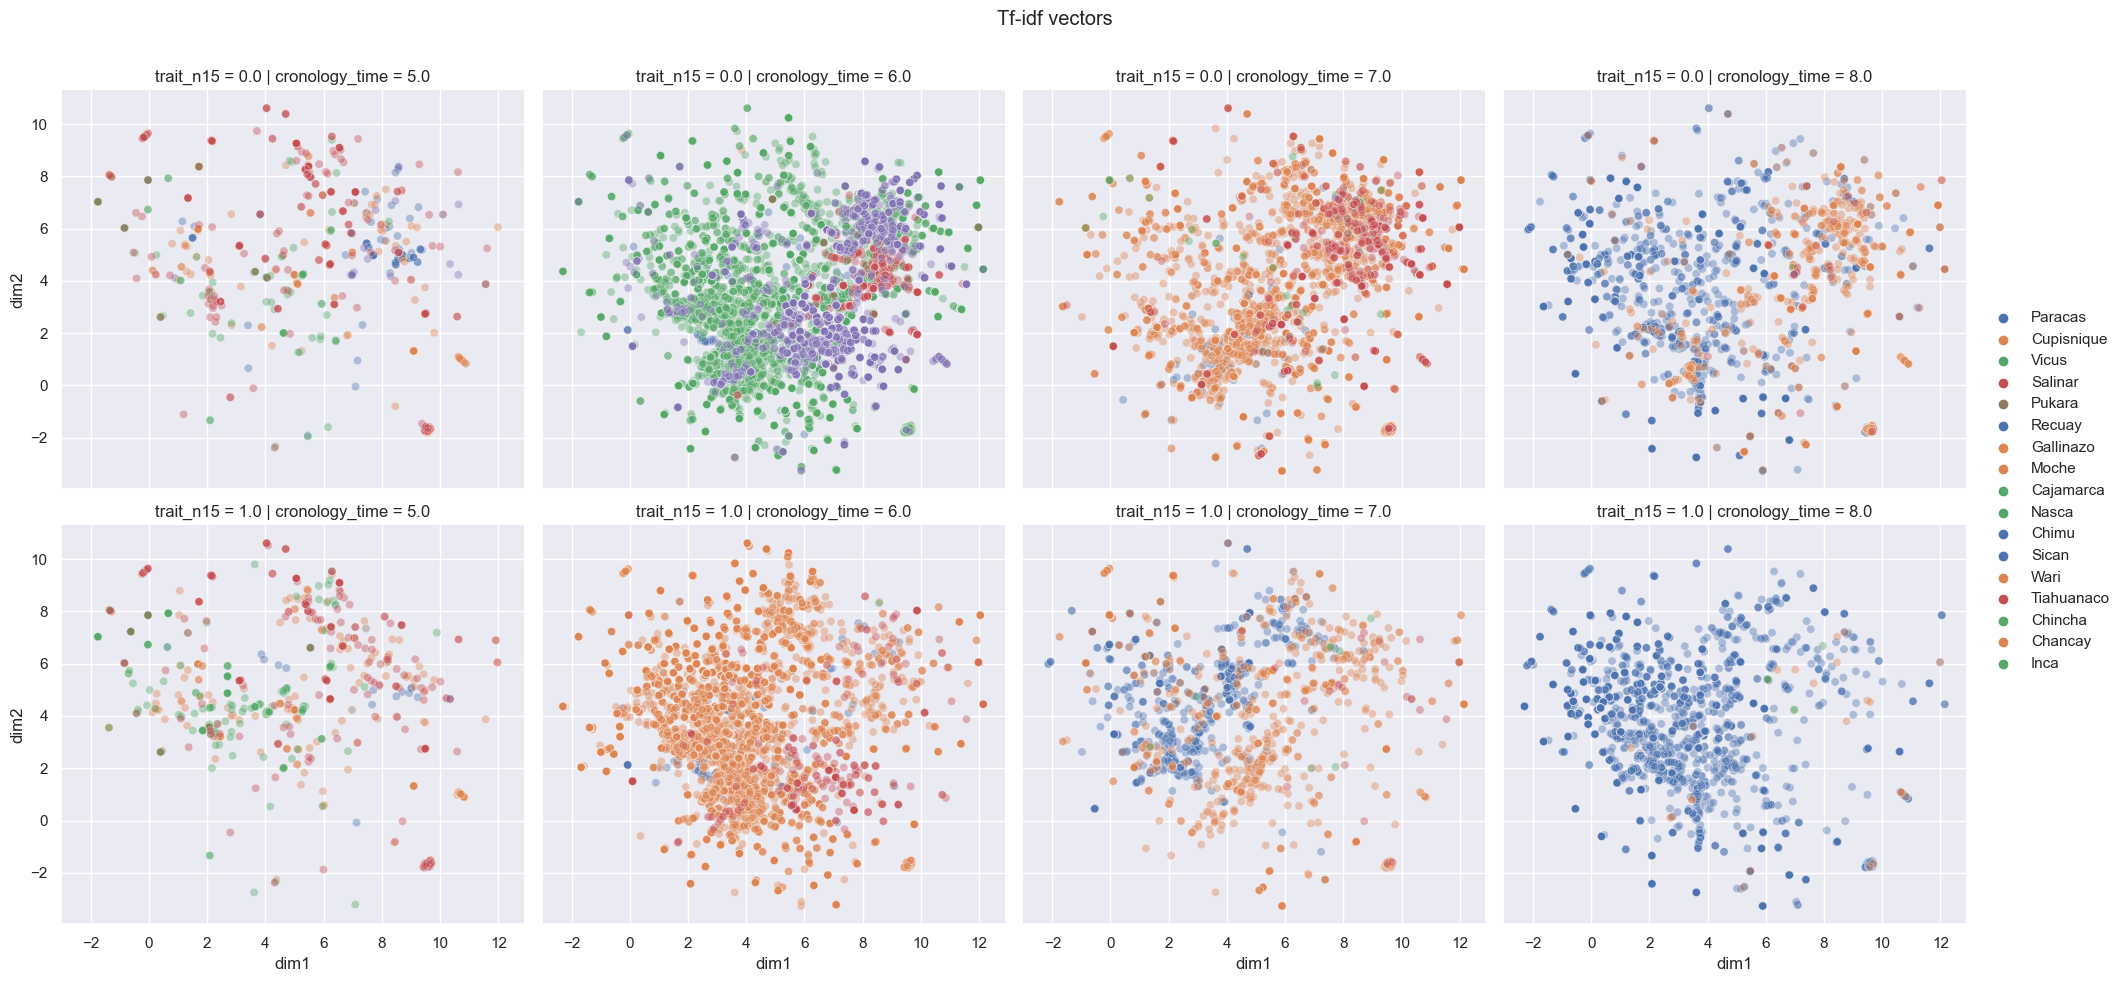

In [35]:
plot_by_attribute(df=tfidf_df_umap, 
                  attribute='cronology_time', 
                  attribute_hue='culture_cl', 
                  title='Tf-idf vectors', 
                  path_to_save='../../data/images/tfidf_vectors/tfidf_clusters_2d_umap_cronology.png',
                  trait=trait)

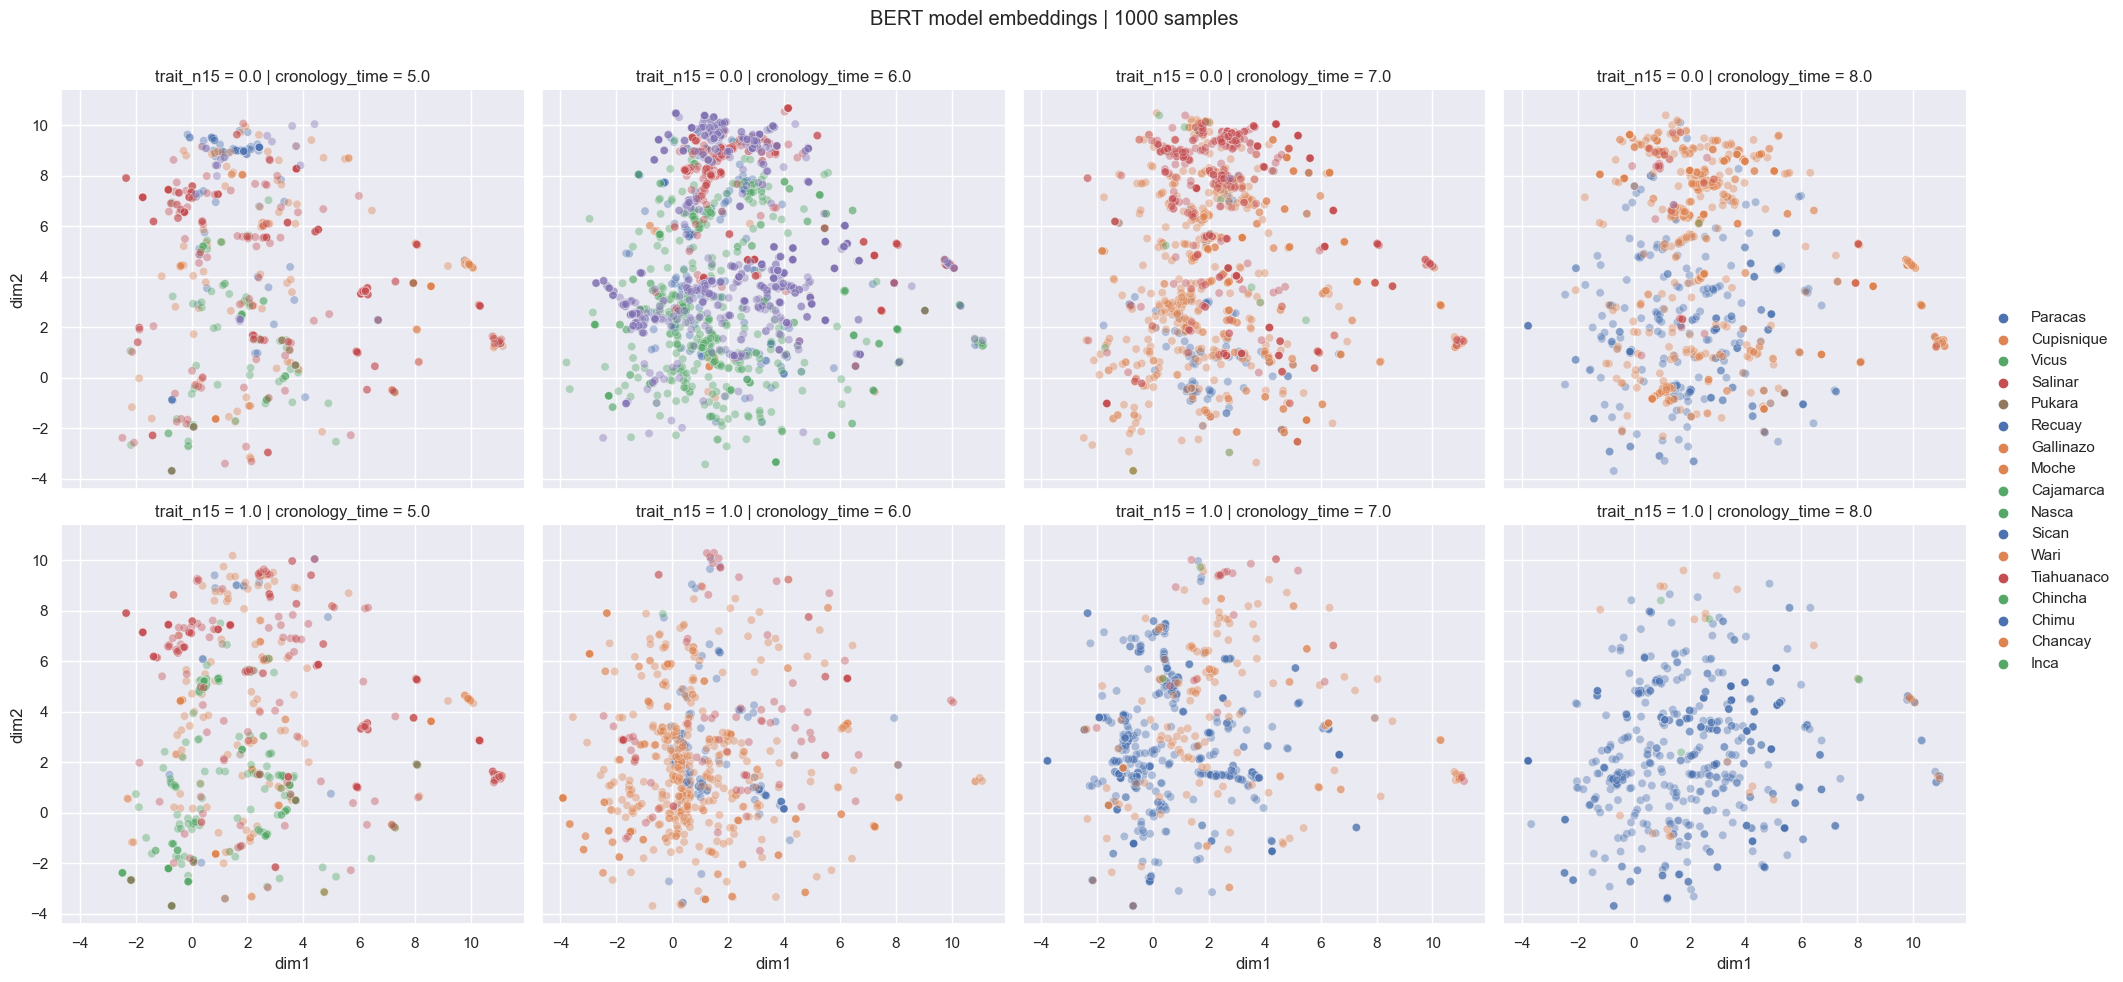

In [36]:
plot_by_attribute(df=bert_df_umap, 
                  attribute='cronology_time', 
                  attribute_hue='culture_cl', 
                  title='BERT model embeddings | 1000 samples', 
                  path_to_save='../../data/images/bert_embeddings/bert_clusters_2d_umap_cronology_1000samples.png',
                  trait=trait,
                  n_samples=1000)

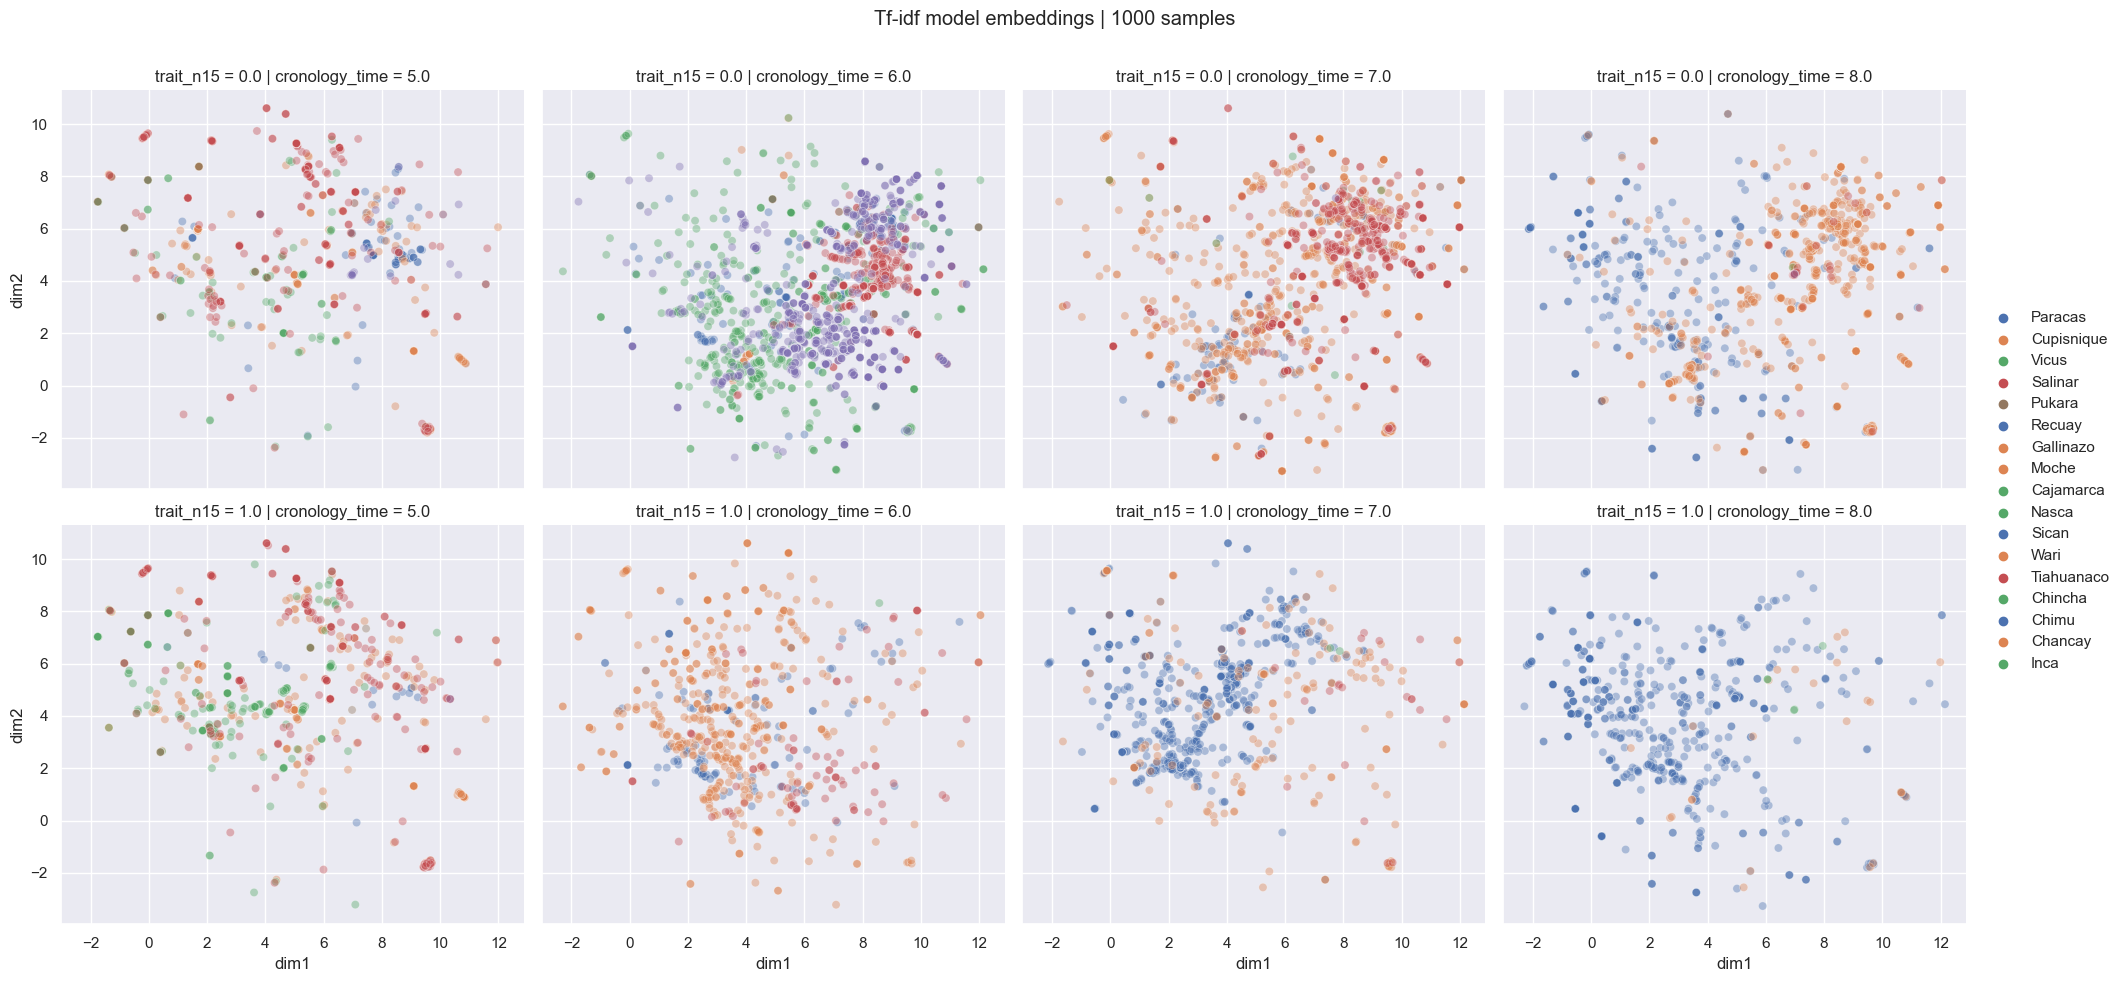

In [37]:
plot_by_attribute(df=tfidf_df_umap, 
                  attribute='cronology_time', 
                  attribute_hue='culture_cl', 
                  title='Tf-idf model embeddings | 1000 samples', 
                  path_to_save='../../data/images/tfidf_vectors/tfidf_clusters_2d_umap_cronology_1000samples.png',
                  trait=trait,
                  n_samples=1000)

# TSNE (deprecated)

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
def get_tsne_df(n_components, perplexity, learning_rate, n_iter):
    tsne = TSNE(n_components=n_components, 
            perplexity=perplexity,
            learning_rate=learning_rate,
            n_iter=n_iter,
            verbose=1, 
            init="random")

    df_spread_tsne = tsne.fit_transform(df_spread)
    df_spread_tsne = pd.DataFrame(df_spread_tsne)
    df_spread_tsne = df_spread_tsne.rename(columns={0: 'dim1', 1: 'dim2', 2: 'dim3'})
    return df_spread_tsne

In [16]:
perplexity = 250
learning_rate = 'auto'
n_iter = 300
trait = 'trait_n15'

df_tsne_2d = get_tsne_df(2, perplexity, learning_rate, n_iter)
df_tsne_3d = get_tsne_df(3, perplexity, learning_rate, n_iter)

[t-SNE] Computing 751 nearest neighbors...
[t-SNE] Indexed 33561 samples in 0.097s...
[t-SNE] Computed neighbors for 33561 samples in 12.200s...
[t-SNE] Computed conditional probabilities for sample 1000 / 33561
[t-SNE] Computed conditional probabilities for sample 2000 / 33561
[t-SNE] Computed conditional probabilities for sample 3000 / 33561
[t-SNE] Computed conditional probabilities for sample 4000 / 33561
[t-SNE] Computed conditional probabilities for sample 5000 / 33561
[t-SNE] Computed conditional probabilities for sample 6000 / 33561
[t-SNE] Computed conditional probabilities for sample 7000 / 33561
[t-SNE] Computed conditional probabilities for sample 8000 / 33561
[t-SNE] Computed conditional probabilities for sample 9000 / 33561
[t-SNE] Computed conditional probabilities for sample 10000 / 33561
[t-SNE] Computed conditional probabilities for sample 11000 / 33561
[t-SNE] Computed conditional probabilities for sample 12000 / 33561
[t-SNE] Computed conditional probabilities for s

In [ ]:
df_tsne_2d['catalogation_id'] = df['catalogation_id']
df_tsne_2d['culture_cl'] = df['culture_cl']
df_tsne_2d['cronology_time'] = df['cronology_time']
df_tsne_3d['catalogation_id'] = df['catalogation_id']
df_tsne_3d['culture_cl'] = df['culture_cl']
df_tsne_3d['cronology_time'] = df['cronology_time']

## Plot 3D


In [ ]:
def plot_embeddings_3d(original_df, tsne_df, model_name, get_samples=False, n_samples=100, filter_by_trait: str=None):
    if filter_by_trait is not None:
        tsne_df[filter_by_trait] = original_df[filter_by_trait]
        tsne_df = tsne_df[tsne_df[filter_by_trait] > 0]

    if get_samples:
        tsne_df = sample_df(tsne_df, n_samples)
    
    sns.set(rc={"figure.figsize":(12, 10)})

    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')

    color_mapping = {
        'Sican': 'red',
        'Recuay': 'blue',
        'Vicus': 'green',
        'Lima': 'yellow',
        'Gallinazo': 'magenta',
        'Moche': 'brown',
        'Salinar': 'black',
        'Paracas': 'white',
        'Wari': 'lightblue',
        'Cajamarca': 'lightgreen',
        'Cupisnique': 'lightyellow',
        'Pukara': 'gray',
        'Nasca': 'pink',
        'Chimu': 'purple',
        'Chanca': 'cyan',
        'Chancay': 'orange',
        'Inca': 'olive',
        'Tiahuanaco': 'gold',
        'Chincha': 'darkred'
    }

    patches = list() # For custom legend
    for culture, color in color_mapping.items():
        culture_df = tsne_df[tsne_df.culture_cl == culture]
        x = culture_df['dim1']
        y = culture_df['dim2']
        z = culture_df['dim3']

        ax.scatter(x, y, z, c=color, marker='o')

        # Set legends
        patch = mpatches.Patch(color=color, label=culture)
        patches.append(patch)


    ax.set_xlabel("Dimensión 1")
    ax.set_ylabel("Dimensión 2")
    ax.set_zlabel("Dimensión 3")
    ax.legend(handles=patches)
    
    plt.title(f'Tres dimensiones UMAP de distintas descripciones de imágenes según cultura | {model_name}')
    plt.show()